# Lineer Olmayan Regresyon

## KNN(en yakın komşu)

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)

In [4]:
knn_model

KNeighborsRegressor()

In [5]:
knn_model.n_neighbors

5

## Tahmin

In [6]:
knn_model.predict(X_train)

array([ 102.5   ,  952.    ,  904.    ,  325.5   ,  768.6666, 1180.6666,
        118.    ,   90.5   ,  708.6666,  840.4   , 1612.1142,  160.    ,
        982.    ,  771.    ,  716.6666,  745.    ,  670.    ,   79.5   ,
        247.5   ,  303.    ,  576.    ,  996.6666,  551.    ,  451.5   ,
         81.6   ,  962.5   ,  491.    ,  425.    ,   88.6   ,  463.    ,
         70.6   ,  680.3334, 1152.3332,   78.6   ,  433.3334,  103.5   ,
        281.2   ,  799.4   ,  106.5   ,   79.5   ,   79.5   ,  553.5   ,
        198.8334,  249.    ,  336.    , 1052.    ,  205.5   ,  126.3   ,
        637.    ,  602.    ,  498.    ,  248.    ,  322.    ,  160.    ,
       1103.6666,  148.4   ,  627.    ,  707.5   ,  220.    , 1472.1142,
        803.    ,  274.2   ,  588.    ,  487.5   ,  150.5   ,  158.3   ,
         84.    ,  694.5   ,  159.5   ,  303.5   ,  336.    ,  986.6666,
        737.5   ,  904.    , 1138.6666,  778.    ,  181.5   ,  498.    ,
        417.5   ,  840.4   ,  412.5   ,  510.    , 

In [8]:
y_pred = knn_model.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

In [10]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## Model Tuning

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
knn_params = {"n_neighbors" : np.arange(1,30,1)}

In [13]:
knn = KNeighborsRegressor()

In [14]:
knn_cv_model = GridSearchCV(knn,knn_params,cv = 10)

In [16]:
knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [18]:
knn_cv_model.best_params_["n_neighbors"]

8

In [19]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [20]:
knn_tuned.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [24]:
 np.sqrt(mean_squared_error(y_test,knn_tuned.predict(X_test))) 

413.7094731463598

# SVR destek vektör regresyonu

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [4]:
from sklearn.svm import SVR

In [6]:
svr_model = SVR(kernel = "linear").fit(X_train,y_train)

In [12]:
y_pred = svr_model.predict(X_train)

In [13]:
y_pred

array([ 403.52804878,  666.91219512,  706.66829268,  194.80853659,
        423.40609756,  666.91219512,  150.08292683,  304.13780488,
        507.88780488,  815.99756098,  801.08902439,  706.66829268,
        731.51585366,  537.70487805,  741.45487805,  562.55243902,
        652.00365854,  145.11341463,  -28.8195122 ,  413.46707317,
        761.33292683,  428.37560976,  463.16219512,  353.83292683,
        219.65609756,  478.07073171,  497.94878049,  328.98536585,
        378.6804878 ,  145.11341463,  135.17439024,  542.67439024,
        681.82073171,  229.59512195,  279.2902439 ,  358.80243902,
        373.71097561,  801.08902439,  463.16219512,  219.65609756,
        155.05243902,  249.47317073,  234.56463415,  194.80853659,
        239.53414634,  746.42439024,  666.91219512,  532.73536585,
        314.07682927,  160.02195122,  368.74146341,  706.66829268,
        637.09512195,  656.97317073,  607.27804878,  622.18658537,
        338.92439024,  691.7597561 ,  378.6804878 ,  701.69878

In [9]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


InvalidIndexError: (slice(None, None, None), None)

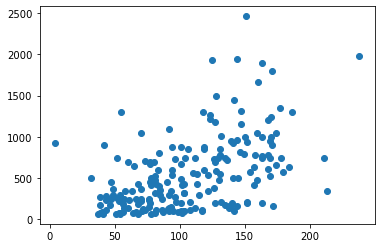

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred)

In [16]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [ ]:
svr

In [18]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [ ]:
doğrusal regresyon

In [17]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

InvalidIndexError: (slice(None, None, None), None)

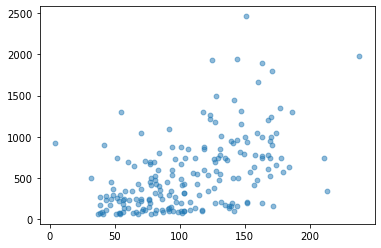

In [19]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

## Tahmin

In [20]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [22]:
svr_model.predict([[91]])

array([403.52804878])

In [23]:
y_pred = svr_model.predict(X_test)

In [24]:
np.sqrt(mean_squared_error(y_test,y_pred))

459.0187960365147

In [28]:
svr_model

SVR(kernel='linear')

## Model Tuning